In [1]:
import os,sys,string, time
import ROOT
from math import *
from ROOT import TTree, TObject, TFile, gDirectory, TLatex, TH1D, TH2D, TH3D, TCanvas, TPad, gROOT, TGaxis, gStyle, TColor, TLegend, THStack, TChain
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
import pandas as pd
from root_numpy import root2array

Welcome to ROOTaaS 6.06/06


In [114]:
fname = "./flashmatchcalib_output_merged.root"

raw_df = pd.DataFrame(root2array(fname,'flashmatchcalib/tree'))
#raw_df = pd.DataFrame(root2array(fname,'t0trackcalib/tree'))
#df=raw_df.query('qll_xmin>-100 & qll_xmin<100')
df=raw_df.query('not score == inf')
#df=df.query('qll_xmin - tpc_xmin > 10 and qll_xmin - tpc_xmin < 22')
#df=df.query('qll_xmin - tpc_xmin > -10 and qll_xmin - tpc_xmin < 10')
df = df.query('score>3e-4')
print df.columns
print len(df)

#my_df = df.query('qll_xmin > 200 and qll_xmin < 300 and tpc_xmin < 5')
#print 'run:',my_df.run.values
#print 'subrun:',my_df.subrun.values
#print 'event:',my_df.event.values

Index([u'run', u'subrun', u'event', u'matchid', u'tpcid', u'flashid',
       u'tpc_xmin', u'qll_xmin', u't0', u'score', u'hypo_pe', u'flash_pe'],
      dtype='object')
41007


In [115]:
def plot_pe_diff(xmin=0.,xmax=1000,nbins=40):
    fig, ax = plt.subplots(figsize=(12, 8),facecolor='w')      
    
    bin_v = np.linspace(xmin, xmax, nbins+1)

    plt.hist(df.flash_pe.values-df.hypo_pe.values,bins=bin_v)
    #print 'mean',np.mean(flash_pe-hypo_pe),'std', np.std(flash_pe)
    plt.grid(True)
    plt.xlabel('Reco Flash - Hypothesis Flash',fontsize=20,fontweight='bold')
    plt.ylabel('Matches',fontsize=20,fontweight='bold')
    plt.title('Flash - Hypothesis PE sum',fontsize=20,fontweight='bold')
    plt.show()
    
def plot_x_diff(xmin=0.,xmax=1000,nbins=40):
    fig, ax = plt.subplots(figsize=(12, 8),facecolor='w')         
    
    bin_v = np.linspace(xmin, xmax, nbins+1)

    res_x = df.qll_xmin.values
    orig_x = df.tpc_xmin.values - df.t0.values * 0.1114359
    diff_data = (res_x - orig_x)

    print 'mean x',diff_data.mean(),'std',diff_data.std()
    
    plt.hist(diff_data,bins=bin_v,label='Hypothesis - Reco')
    plt.grid(True)
    plt.xlabel('QLL Estimated - TPC x min [cm]',fontsize=20,fontweight='bold')
    plt.ylabel('Matches',fontsize=20,fontweight='bold')
    plt.title('X-Min Diff: QLL - TPC Estimated',fontsize=24,fontweight='bold')
    leg=plt.legend(fontsize=20,loc=1)
    leg_frame=leg.get_frame()
    leg_frame.set_facecolor('white')
    plt.show()
    
def plot_xcorr(nbinsx,xmin,xmax,nbinsy,ymin,ymax):
    fig, ax = plt.subplots(figsize=(12, 8),facecolor='w')
    res_x = df.qll_xmin.values
    orig_x = df.tpc_xmin.values - df.t0.values * 0.1114359
    
    plt.hist2d(res_x,orig_x,bins=(nbinsx,nbinsy),
               range=((xmin,xmax),(ymin,ymax)),norm=LogNorm()) #,norm=LogNorm()
    plt.tick_params(labelsize=20)
    plt.grid()
    plt.ylabel('Truth X-Min [cm]',fontsize=20,fontweight='bold')
    plt.xlabel('QLL Estimated X-Min [cm]',fontsize=20,fontweight='bold')
    #leg=plt.legend(fontsize=20,loc=1)
    #leg_frame=leg.get_frame()
    #leg_frame.set_facecolor('white')
    plt.title('X-Min Comparison: QLL Estimate vs. MC',fontsize=24,fontweight='bold')
    plt.colorbar()
    plt.show()
    
def plot_xcorr_two(nbinsx,xmin,xmax,nbinsy,ymin,ymax):
    fig, ax = plt.subplots(figsize=(12, 8),facecolor='w')
    
    this_df_1 = df.query('qll_xmin - tpc_xmin > 10')# and qll_xmin - tpc_xmin < 30')
    res_x_1 = this_df_1.qll_xmin.values
    orig_x_1 = this_df_1.tpc_xmin.values - this_df_1.t0.values * 0.1114359
    
    this_df_2 = df.query('qll_xmin - tpc_xmin > -10 and qll_xmin - tpc_xmin < 10')
    res_x_2 = this_df_2.qll_xmin.values
    orig_x_2 = this_df_2.tpc_xmin.values - this_df_2.t0.values * 0.1114359
    
    plt.plot(res_x_1,orig_x_1,'+',label='Muon')
    plt.plot(res_x_2,orig_x_2,'+',label='Muon')

    #plt.hist2d(res_x_1,orig_x_1,bins=(nbinsx,nbinsy),
    #           range=((xmin,xmax),(ymin,ymax))) #,norm=LogNorm()
    
    #plt.hist2d(res_x_2,orig_x_2,bins=(nbinsx,nbinsy),
    #           range=((xmin,xmax),(ymin,ymax)))
    
    plt.tick_params(labelsize=20)
    plt.grid()
    plt.ylabel('Truth X-Min [cm]',fontsize=20,fontweight='bold')
    plt.xlabel('QLL Estimated X-Min [cm]',fontsize=20,fontweight='bold')
    #leg=plt.legend(fontsize=20,loc=1)
    #leg_frame=leg.get_frame()
    #leg_frame.set_facecolor('white')
    plt.title('X-Min Comparison: QLL Estimate vs. MC',fontsize=24,fontweight='bold')
    #plt.colorbar()
    plt.show()

def plot_score(xmin=0.,xmax=1000,nbins=40):
    fig, ax = plt.subplots(figsize=(12, 8),facecolor='w')      
    
    bin_v = np.linspace(xmin, xmax, nbins+1)

    plt.hist(df.score,bins=bin_v)
    #print 'mean',np.mean(flash_pe-hypo_pe),'std', np.std(flash_pe)
    plt.grid(True)
    plt.xlabel('Score',fontsize=20,fontweight='bold')
    plt.ylabel('Matches',fontsize=20,fontweight='bold')
    plt.title('Score',fontsize=20,fontweight='bold')
    plt.show()
    
def plot_run_number(xmin=0.,xmax=1000,nbins=40):
    fig, ax = plt.subplots(figsize=(12, 8),facecolor='w')      
    
    bin_v = np.linspace(xmin, xmax, nbins+1)

    plt.hist(df.run,bins=bin_v)
    #print 'mean',np.mean(flash_pe-hypo_pe),'std', np.std(flash_pe)
    plt.grid(True)
    plt.xlabel('Score',fontsize=20,fontweight='bold')
    plt.ylabel('Matches',fontsize=20,fontweight='bold')
    plt.title('Score',fontsize=20,fontweight='bold')
    plt.show()
    

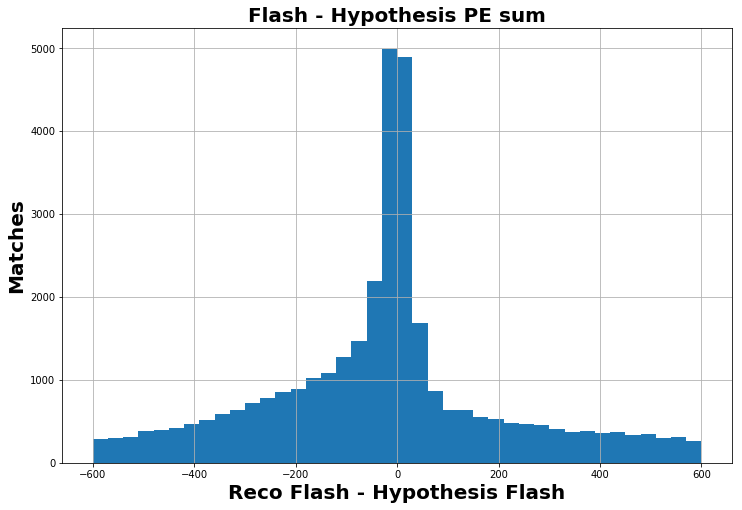

mean x 30.230058448 std 59.4130938385


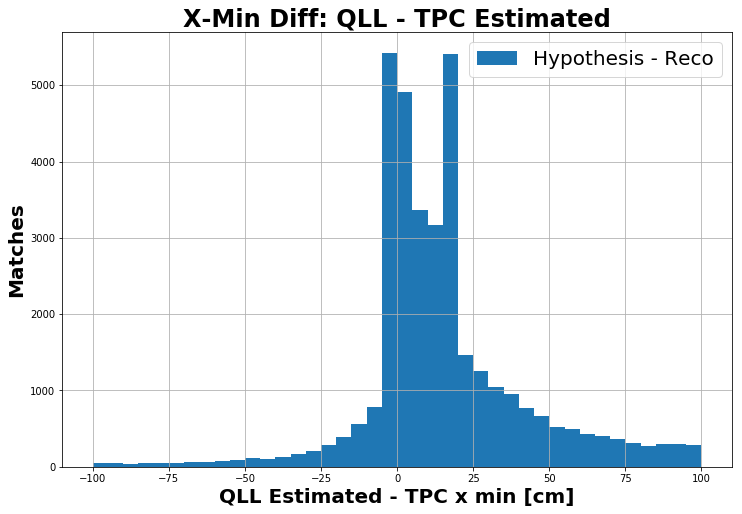

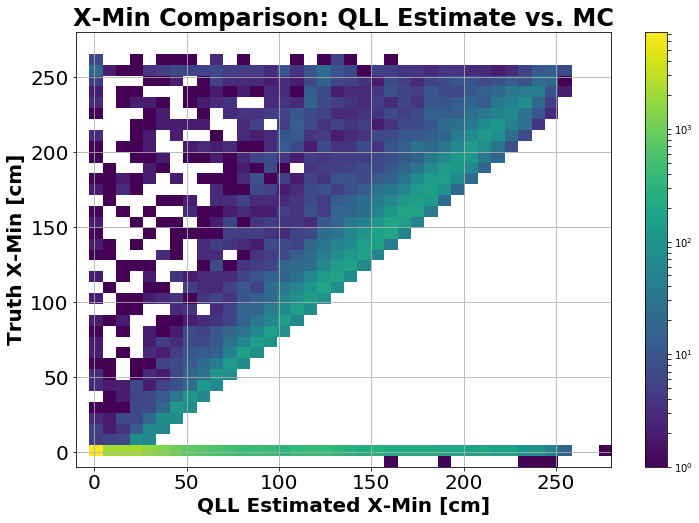

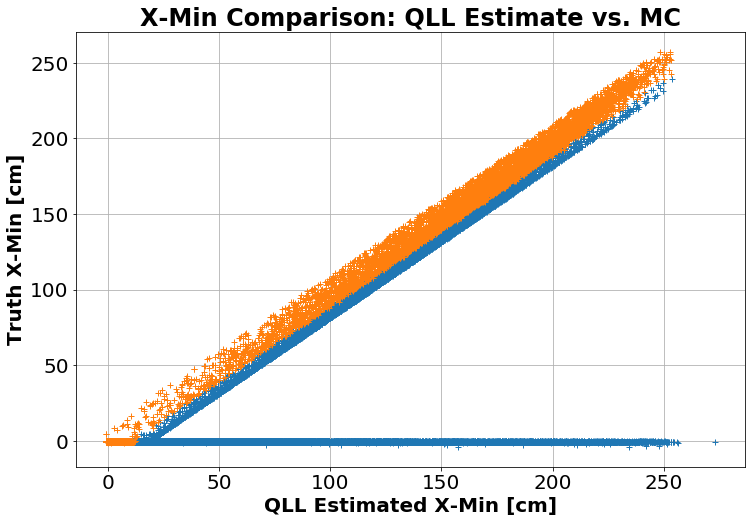

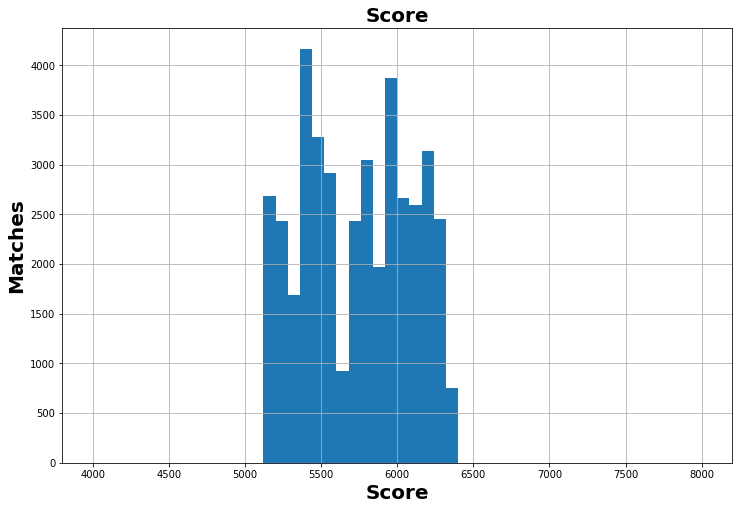

If Many-To-One:
signal 0
background 41007
0.0
If One-To-Many:
41007
41007
1.0


In [116]:
plot_pe_diff(-600,600,40)
plot_x_diff(-100,100,40)
plot_xcorr(40,-10,280,40,-10,280)
plot_xcorr_two(40,0,260,40,0,260)
plot_run_number(4000,8000,50)
#plot_score(0,0.0005,100)

sg_df = df.query('-1.5 < t0 and t0 < -0.5')
#bg_df = df.query('t0 < -1.5 or -0.5 < t0 ')
bg_df = df.query('(t0 < -1.5 and t0 >-5000) or (-0.5 < t0 and t0 < 5000)')

print "If Many-To-One:"
print 'signal',len(sg_df)
print 'background', len(bg_df)
print len(sg_df)/float(len(sg_df)+len(bg_df))

print "If One-To-Many:"
df2 = df.query('tpcid==0')
print len(df2)
print len(df)
print float(len(df2)) / float(len(df))